In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
from importlib import reload

from src.dr.pca import Pca
from src.strats.starb_fm import StArbFm
import src.backtest
from src.backtest import backtest
PATH = 'data'

In [2]:
df = pd.read_pickle('{}/top_500_excess_returns.pkl'.format(PATH))
spy = pd.read_pickle('{}/spy_lr.pkl'.format(PATH))

Registered Corr_pca_252
Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000
pca|Pr=50|sp=5|cal=5|win=252 | Sharpe: 0.7 | p-value: 0.0017225054589832256
pca|Pr=75|sp=5|cal=5|win=252 | Sharpe: 0.74 | p-value: 0.0008589238083963613
pca|Pr=95|sp=5|cal=5|win=252 | Sharpe: 0.66 | p-value: 0.0023407334184935014
pca|Rmt|sp=5|cal=5|win=252 | Sharpe: 0.74 | p-value: 0.0009035159211338017


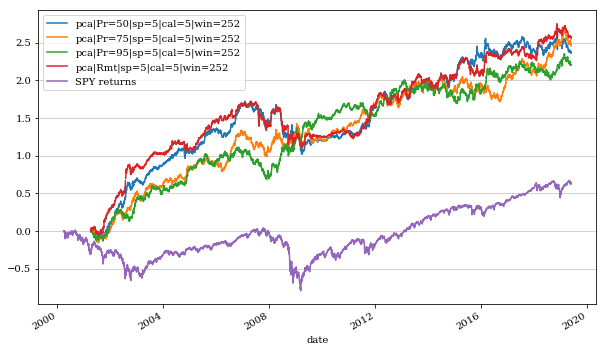

In [3]:
w = 252
cal = 5
sp = 5
strats = [StArbFm(Pca(pr=50, corr=True), cal_freq=cal, span=sp, window_len=w), \
          StArbFm(Pca(pr=75, corr=True), cal_freq=cal, span=sp, window_len=w), \
          StArbFm(Pca(pr=95, corr=True), cal_freq=cal, span=sp, window_len=w), \
          StArbFm(Pca(rmt=True, corr=True), cal_freq=cal, span=sp, window_len=w)]

backtest(df, strats, benchmark=spy, it=1000)

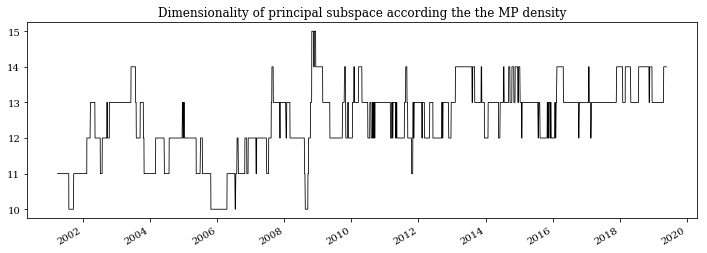

In [4]:
strats[-1].plot_dimensionality()
plt.title('Dimensionality of principal subspace according the the MP density')
plt.savefig('figs/n_pcs_mp.pdf', format='pdf', dpi=1200, bbox_inches='tight')

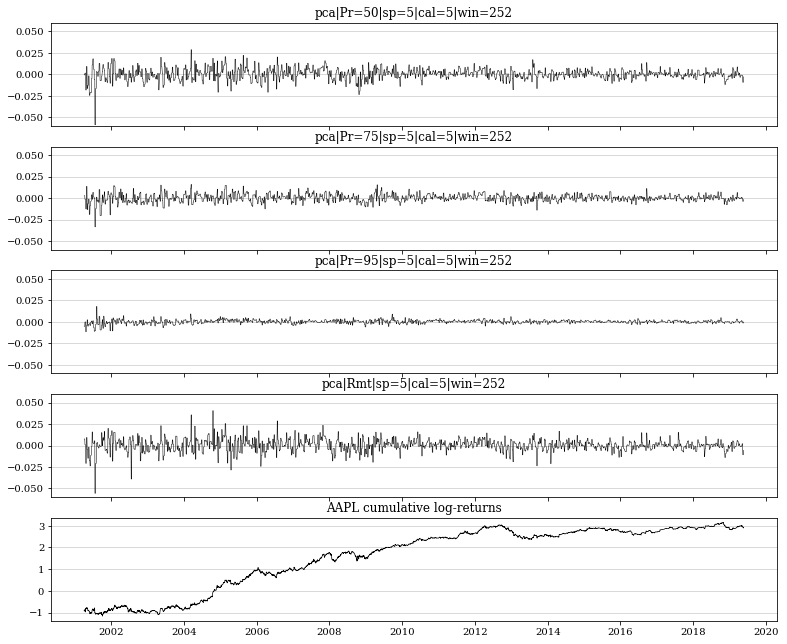

In [4]:
fig, ax = plt.subplots(len(strats) + 1, 1, sharex=True, figsize=(13, 11))
for ix, strat in enumerate(strats):
    ax[ix].set_ylim(-0.06, 0.06)
    ax[ix].plot(-1 * strat.portfolios['AAPL'], label=strat.id, c='k', linewidth=.5)
    ax[ix].grid(axis='y', alpha=.6)
    ax[ix].set_title(strat.id)
ax[-1].plot(df['AAPL'].cumsum().loc[strats[-1].trading_days], c='k', lw=.7)
ax[-1].set_title('AAPL cumulative log-returns')
ax[-1].grid(axis='y', alpha=.6)
plt.savefig('figs/aapl_resid.pdf', format='pdf', dpi=1200, bbox_inches='tight')